In [24]:
#1. Data Preparation
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("heart_disease.csv")  # Replace with your actual dataset path
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0


In [25]:
df = df.drop(columns=['fbs'])

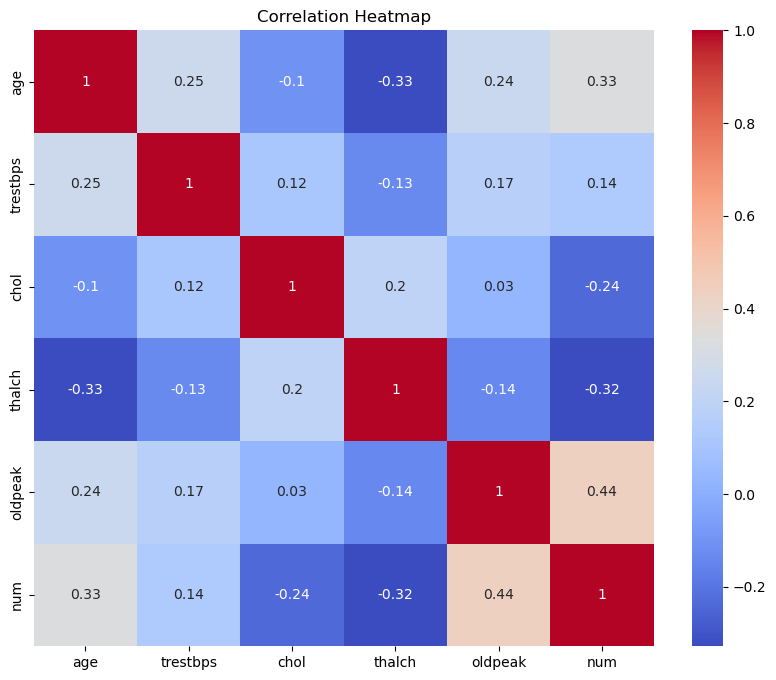

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
# Compute correlation only on numeric columns
numeric_df = df.select_dtypes(include='number')
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [27]:
#3. Feature Engineering
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables if present
for col in df.select_dtypes(include='object').columns:
    df[col] = LabelEncoder().fit_transform(df[col])

# Ensure no missing values remain
df.fillna(df.median(numeric_only=True), inplace=True)

In [28]:
#4. Decision Tree Classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Define X and y
X = df.drop('num', axis=1)  # Replace 'target' with actual target column name if different
y = df['num']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Predict and evaluate
y_pred = dt.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
#print("Classification Report:\n", classification_report(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division=0))

Accuracy: 0.4725274725274725
              precision    recall  f1-score   support

           0       0.72      0.72      0.72        89
           1       0.33      0.29      0.31        48
           2       0.30      0.36      0.33        22
           3       0.00      0.00      0.00        17
           4       0.00      0.00      0.00         6

    accuracy                           0.47       182
   macro avg       0.27      0.27      0.27       182
weighted avg       0.47      0.47      0.47       182



In [29]:
#5. Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

grid = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)

# Evaluate the best model
best_dt = grid.best_estimator_
y_pred_best = best_dt.predict(X_test)

print("Tuned Accuracy:", accuracy_score(y_test, y_pred_best))
#print("Classification Report:\n", classification_report(y_test, y_pred_best))
print(classification_report(y_test, y_pred, zero_division=0))

Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}
Tuned Accuracy: 0.5714285714285714
              precision    recall  f1-score   support

           0       0.72      0.72      0.72        89
           1       0.33      0.29      0.31        48
           2       0.30      0.36      0.33        22
           3       0.00      0.00      0.00        17
           4       0.00      0.00      0.00         6

    accuracy                           0.47       182
   macro avg       0.27      0.27      0.27       182
weighted avg       0.47      0.47      0.47       182



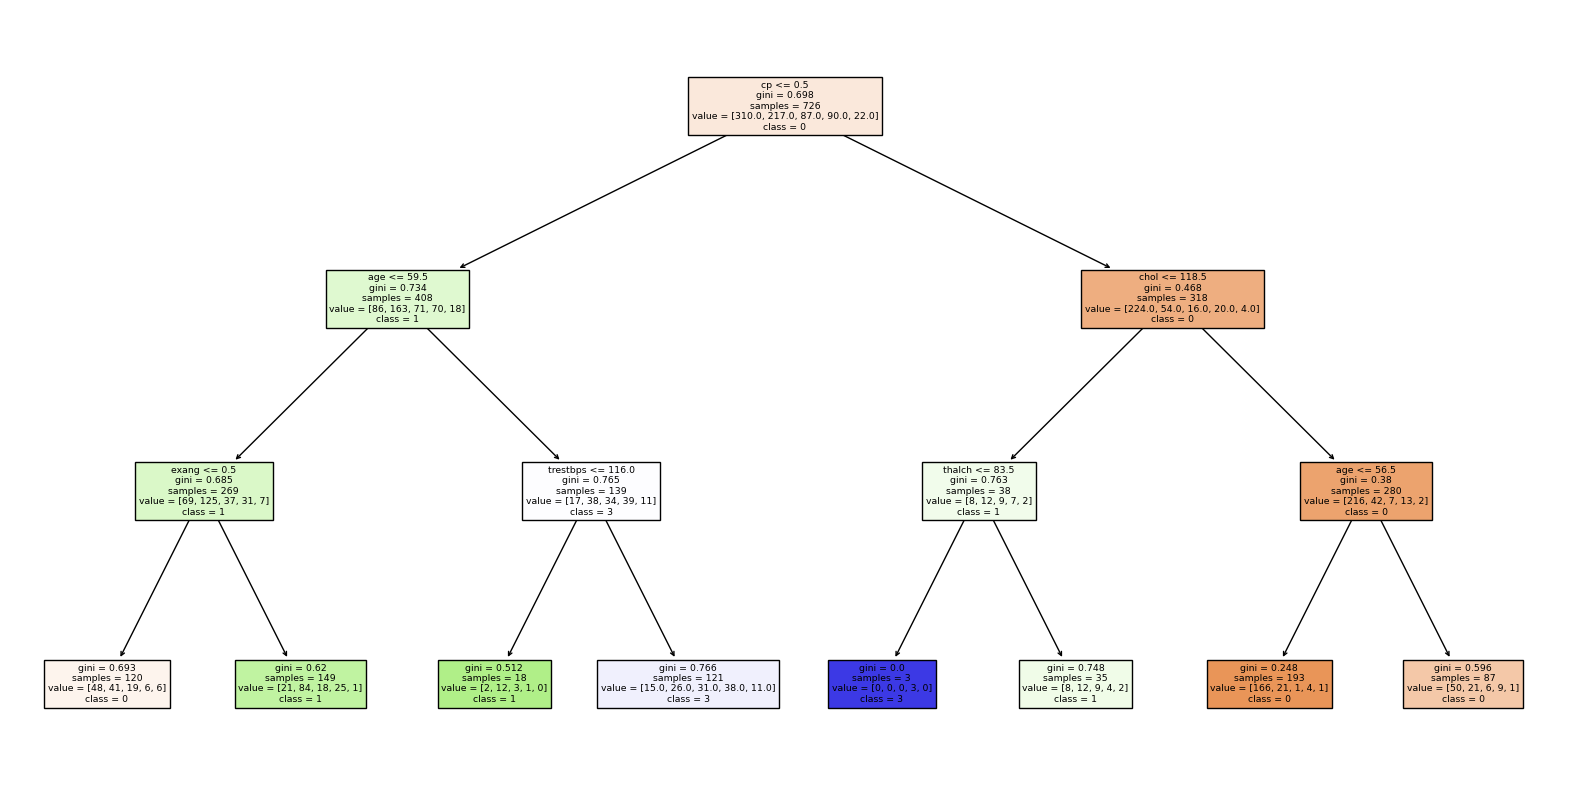

In [30]:
#6. Visualize the Decision Tree
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(best_dt, 
          feature_names=X.columns, 
          class_names=[str(cls) for cls in best_dt.classes_], 
          filled=True)
plt.show()
